In [1]:
#Import important Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pyplot import xticks

# Step 1 - DATA CLEANING:

In [2]:
# Check the data frame 
df1 = pd.read_csv('Desktop/Leads.csv')
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
### Lets check columns which has only one value and we will drop them 

In [3]:
# Find columns with only one unique value
columns_to_drop = []
for column in df1.columns:
    unique_values = df1[column].nunique()
    if unique_values == 1:
        columns_to_drop.append(column)

# Drop columns with only one unique value from the DataFrame
df1 = df1.drop(columns=columns_to_drop)

In [4]:
df1.shape

(9240, 32)

In [6]:
# Where customer did not select any option, it is showing as select so  Lets replace 'Select' as null
df1 = df1.replace('Select', np.nan)

In [7]:
#now check for null
df1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [8]:
# Check in percentage
round(100*(df1.isnull().sum()/len(df1.index)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums          

In [9]:
#Now Lets remove some less relevant fields having null values more than 30%
df2 = df1.drop(['How did you hear about X Education','Lead Profile','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags'],axis=1)
df2.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Low in Relevance,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,NaN,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Might be,Mumbai,No,Modified


In [11]:
#Check again 
round(100*(df2.isnull().sum()/len(df2.index)), 1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [12]:
# In above as we can see lead quality has 51% null and # it is marked by the employee, so we can replace null with 'not Sure' 
df2['Lead Quality'] = df2['Lead Quality'].replace(np.nan, 'Not Sure')

In [13]:
#Lets check for city column
#df2['City'].value_counts()

#It not looking very useful we will drop this 

#And also drop 'What matters most to you in choosing a course' as it has around 30% null and looking not very useful

df3 = df2.drop(['City', 'What matters most to you in choosing a course'], axis = 1)
df3.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Unemployed,No,No,No,No,No,No,Low in Relevance,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Unemployed,No,No,No,No,No,No,Not Sure,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Student,No,No,No,No,No,No,Might be,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Unemployed,No,No,No,No,No,No,Not Sure,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Unemployed,No,No,No,No,No,No,Might be,No,Modified


In [14]:
#Check null again 

round(100*(df3.isnull().sum()/len(df3.index)), 1)

Prospect ID                                0.0
Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.4
Do Not Email                               0.0
Do Not Call                                0.0
Converted                                  0.0
TotalVisits                                1.5
Total Time Spent on Website                0.0
Page Views Per Visit                       1.5
Last Activity                              1.1
Country                                   26.6
Specialization                            36.6
What is your current occupation           29.1
Search                                     0.0
Newspaper Article                          0.0
X Education Forums                         0.0
Newspaper                                  0.0
Digital Advertisement                      0.0
Through Recommendations                    0.0
Lead Quality                               0.0
A free copy o

In [15]:
#Now lets Handle Country and Specialization columns
df3['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Italy                      2
Ghana                      2
Netherlands                2
China                      2
Bangladesh                 2
Uganda                     2
Belgium                    2
Philippines                2
Asia/Pacific Region        2
Vietnam                    1
Liberia                    1
Malaysia                   1
Switzerland                1
Tanzania                   1
Denmark                    1
Sri Lanka     

In [16]:
# Lets assign nulls a value called 'No Info Available' 
df3['Country'] = df3['Country'].fillna('No Info Available')

In [17]:
#and since all other country has very ingnificant number separatly lets merger and call it as 'outside india' 
#there will be only 3 categories india, no info & outside india
def slots(x):
    category = ''
    if x == 'India':
        category = 'India'
    elif x == 'No Info Available':
        category = 'No Info Available'
    else:
        category = "Outside India"
    return category

df3['Country'] = df3.apply(lambda x:slots(x['Country']), axis = 1)
df3['Country'].value_counts()

India                6492
No Info Available    2461
Outside India         287
Name: Country, dtype: int64

In [18]:
#Similarly for Specialization column lets replace null with 'No Info Available'

df3['Specialization'] = df3['Specialization'].fillna('No Info Available')
df3['Specialization'].value_counts()

No Info Available                    3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
#Check null again 

round(100*(df3.isnull().sum()/len(df3.index)), 1)

Prospect ID                                0.0
Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.4
Do Not Email                               0.0
Do Not Call                                0.0
Converted                                  0.0
TotalVisits                                1.5
Total Time Spent on Website                0.0
Page Views Per Visit                       1.5
Last Activity                              1.1
Country                                    0.0
Specialization                             0.0
What is your current occupation           29.1
Search                                     0.0
Newspaper Article                          0.0
X Education Forums                         0.0
Newspaper                                  0.0
Digital Advertisement                      0.0
Through Recommendations                    0.0
Lead Quality                               0.0
A free copy o

In [20]:
# total number of rows are very few and will not effect the model so we can drop the entire rows containing null values
df4 = df3.dropna()

In [21]:
#Check null again 

round(100*(df4.isnull().sum()/len(df4.index)), 1)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Lead Quality                              0.0
A free copy of Mastering The Inter

In [22]:
#Also Lets drop the Lead Number  since its not relevant also its unique value assigned to each lead 

final_data =df4.drop(['Lead Number'], axis =1)
final_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,No,No,No,No,No,No,Low in Relevance,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,No,No,No,No,No,No,Not Sure,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,No,No,No,No,No,No,Might be,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,No,No,No,No,No,No,Not Sure,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,No,No,No,No,No,No,Might be,No,Modified


# Step 2 -  EDA

### 'Converted' is our target variable so lets compare other variables vs converted using visualization

In [23]:
#Before jumping into analysis lets convert the data frame into lowercase for more accuracy in categorical vairables 
final_data = final_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

### Lead origin vs converted

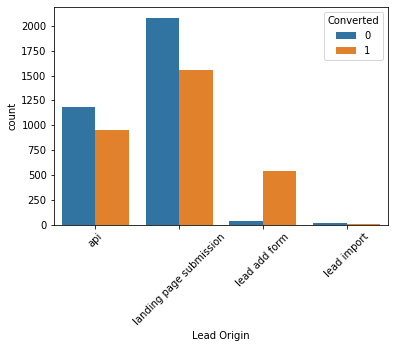

In [25]:
sns.countplot(x="Lead Origin", hue="Converted", data=final_data)
xticks(rotation = 45)
plt.show()

#### Highlights: 
##### 1. 'Landing Page Submission' is having best conversion% followed by API
##### 2. 'Lead Import' is neglible 
##### 3. 'Lead add form' conversion is high but lead counts looks minimal

#### Suggestion:
##### 1. Since  'Landing Page Submission' has best conversion business should focus more on to it
##### 2. Also should focus on increasing leads from 'Lead Add From' that will also add up good conversion

### Do Not Email and Do Not Call vs converted

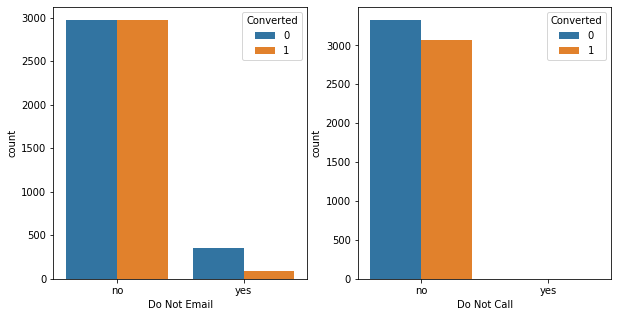

In [28]:
fig, axs = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = final_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = final_data, ax = axs[1])
plt.show()

#### Highlights: 
##### 'Do Not Call' & 'Do Not Email' are not making any significant negative mark on conversion  hence it can be ignored

### TotalVisits

In [31]:
final_data['TotalVisits'].describe()

count    6391.000000
mean        3.620091
std         5.042908
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

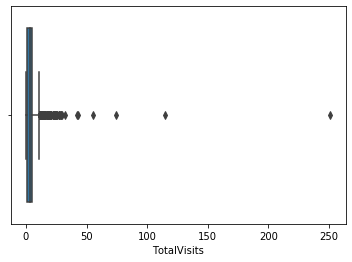

In [32]:
sns.boxplot(final_data['TotalVisits'])
plt.show()

In [33]:
#Set outliers to 90%


# Calculate the 90th percentile of the 'TotalVisits' column
percentile_90 = final_data['TotalVisits'].quantile(0.90)

# Replace outliers with the 90th percentile value
final_data.loc[final_data['TotalVisits'] > percentile_90, 'TotalVisits'] = percentile_90

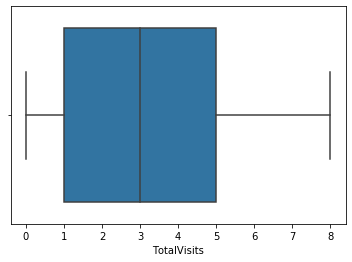

In [34]:
sns.boxplot(final_data['TotalVisits'])
plt.show()

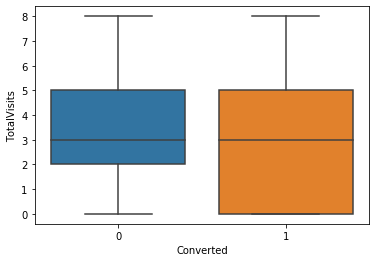

In [35]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = final_data)
plt.show()

#### Highlights: 
##### Median are almost similar for both converted and non converted hence ignore the 'TotalVisits'

### Total Time Spent on Website & Page Views Per Visit vs Converted

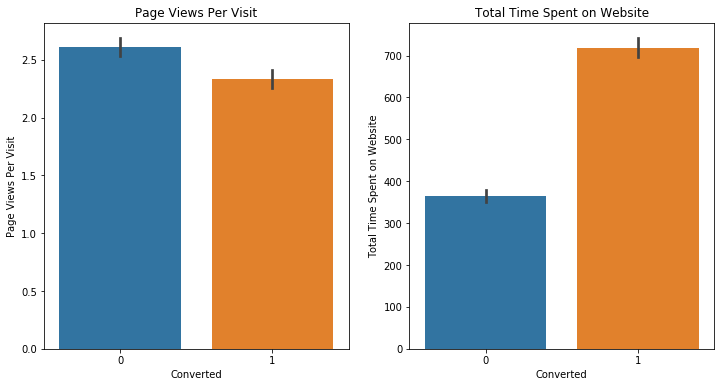

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'Page Views Per Visit'
sns.barplot(y='Page Views Per Visit', x='Converted', data=final_data, ax=axes[0])
axes[0].set_title('Page Views Per Visit')

# Plot for 'Total Time Spent on Website'
sns.barplot(y='Total Time Spent on Website', x='Converted', data=final_data, ax=axes[1])
axes[1].set_title('Total Time Spent on Website')
plt.show()

#### Highlights:
##### 'Page Views Per Visit' are similar 
##### Conversion is high on 'Total Time Spent on Website' shoud increase the website visibilty

### Last Activity

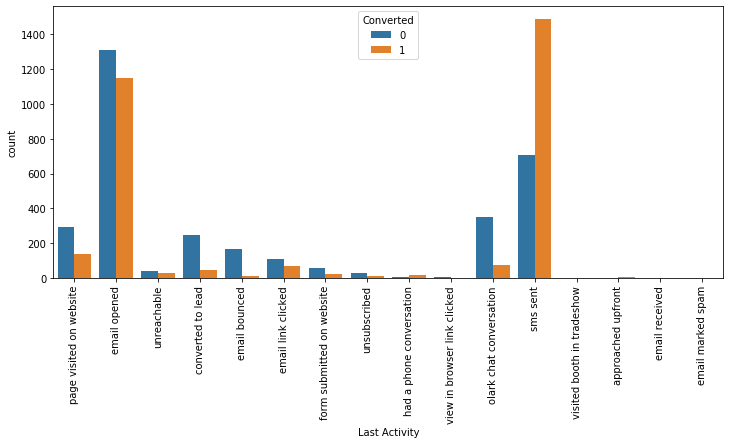

In [41]:
fig, axs = plt.subplots(figsize = (12,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = final_data)
xticks(rotation = 90)
plt.show()

#### Highlights: 
##### 'email opened' and 'sms sent' are the top 2 activities 

### What is your current occupation

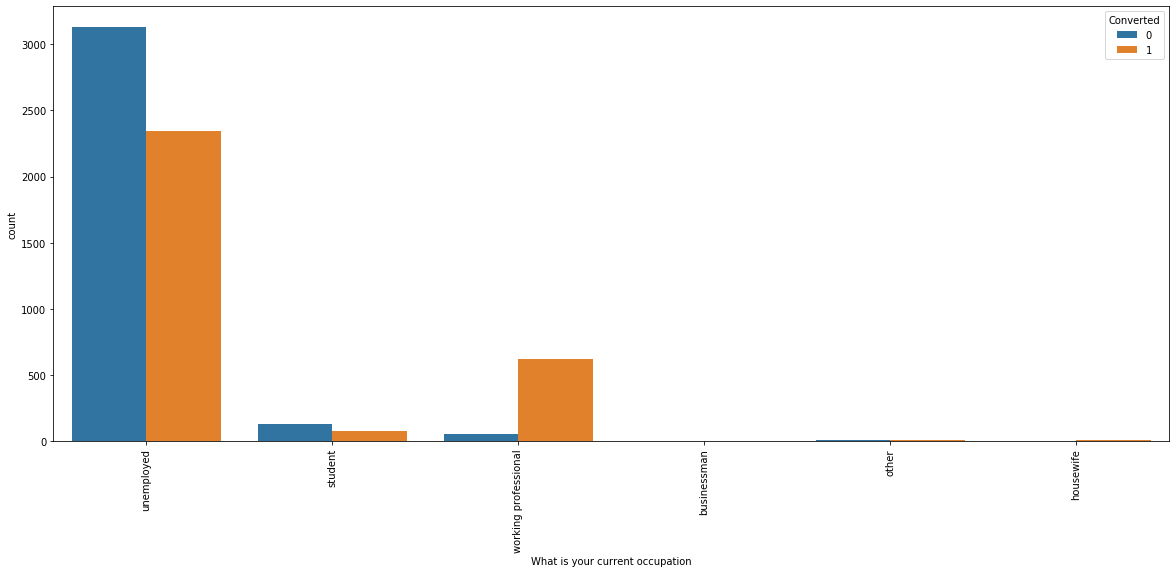

In [44]:
fig, axs = plt.subplots(figsize = (20,8))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = final_data)
xticks(rotation = 90)
plt.show()

#### Highlights: 

##### 1. Conversion is great for working professional 
##### 2. Unemployed leads are the top most in numbers conversion rate isnt that great.

#### Suggestion:
##### 1. Should focus for incresing leads on working professionals
##### 2. Also should focus on umemployeed conversion for conversion%

### Country

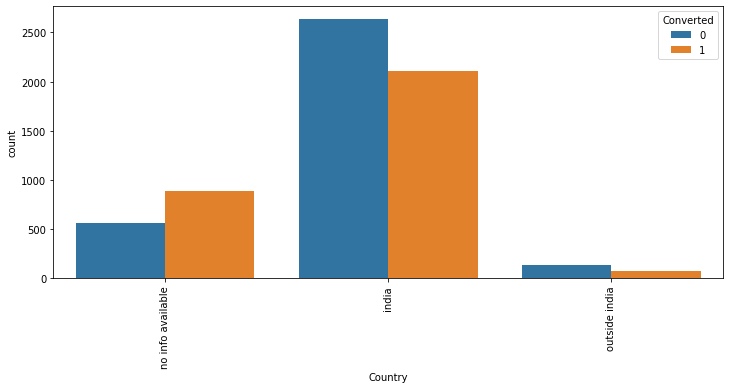

In [47]:
fig, axs = plt.subplots(figsize = (12,5))
sns.countplot(x = "Country", hue = "Converted", data = final_data)
xticks(rotation = 90)
plt.show()

#### Highlights: 
#### India it is, no major conclusion from this

### Specialization

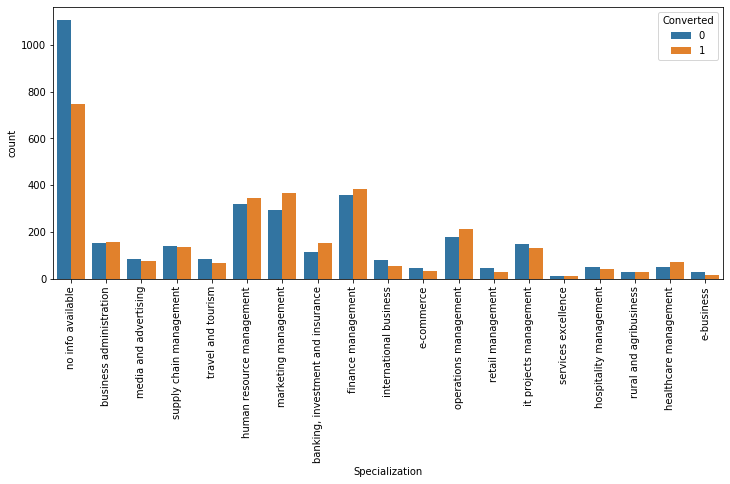

In [50]:
fig, axs = plt.subplots(figsize = (12,5))
sns.countplot(x = "Specialization", hue = "Converted", data = final_data)
xticks(rotation = 90)
plt.show()

#### Highlights: 
##### There is not any specific 'Specialization' that is popping out but if we consider management as a category it it contributing more
##### Can focus more on management 'Specialization'  but before that should deep down the analysis on it

### Other Fields

In [53]:
# I checked all the below fields individually and in all of that 'No' is the top answer so bringing it together

final_data[['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']].describe()

,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,6391,6391,6391,6391,6391,6391,6391
unique,2,2,1,2,2,2,2
top,no,no,no,no,no,no,no
freq,6381,6390,6391,6390,6388,6385,4220


#### Highlights: 
#### As 'No' is the top ans no insight can be pulled from it

### Lead Quality

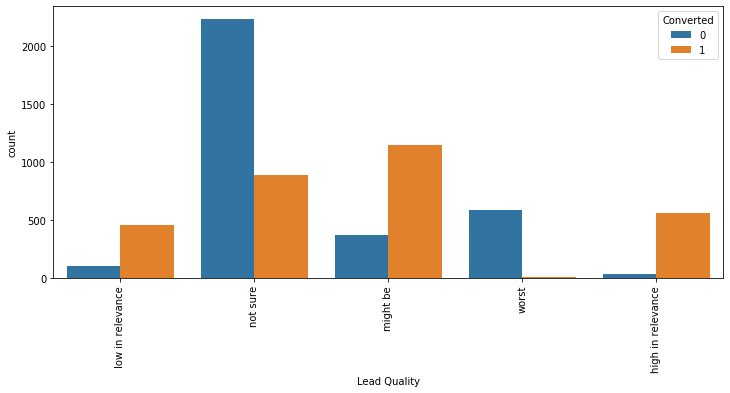

In [56]:
fig, axs = plt.subplots(figsize = (12,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = final_data)
xticks(rotation = 90)
plt.show()

#### Highlights: 
#### No Insight as most cases are 'not sure'

### Last Notable Activity

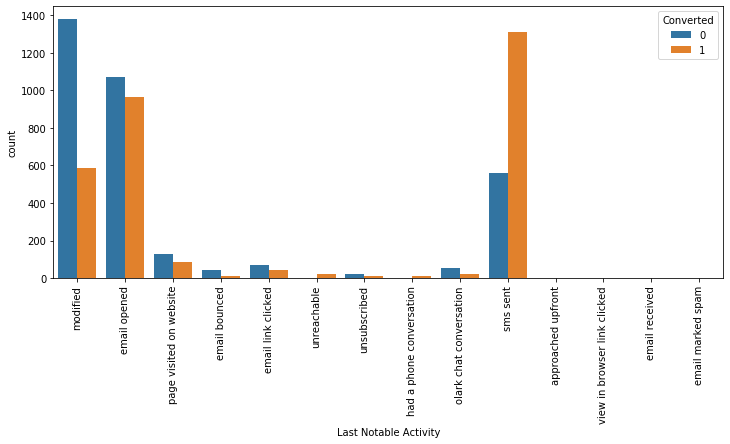

In [59]:
fig, axs = plt.subplots(figsize = (12,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = final_data)
xticks(rotation = 90)
plt.show()

#### Highlights: 
##### 'email opened' and 'sms sent' are the top 2 activities  
##### 'modified' has many leads but conversion is not great

# STEP 3- DATA PREPARATION FOR MODEL BUILDING

### Checking the data

In [61]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6391 non-null   object 
 1   Lead Origin                             6391 non-null   object 
 2   Lead Source                             6391 non-null   object 
 3   Do Not Email                            6391 non-null   object 
 4   Do Not Call                             6391 non-null   object 
 5   Converted                               6391 non-null   int64  
 6   TotalVisits                             6391 non-null   float64
 7   Total Time Spent on Website             6391 non-null   int64  
 8   Page Views Per Visit                    6391 non-null   float64
 9   Last Activity                           6391 non-null   object 
 10  Country                                 6391 non-null   obje

In [62]:
#Lets drop some irrelvant fieds for model building
final_data = final_data.drop(['Do Not Call','Do Not Email','Country','Search', 'Newspaper Article', 'X Education Forums',
                        'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],1)

final_data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,0,0.0,0,0.0,page visited on website,no info available,unemployed,low in relevance,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,0,5.0,674,2.5,email opened,no info available,unemployed,not sure,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,student,might be,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,unemployed,not sure,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,1,2.0,1428,1.0,converted to lead,no info available,unemployed,might be,modified


### Creating Dummy variable 

In [63]:
dummy1 = pd.get_dummies(final_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Lead Quality','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_olark chat,Lead Source_organic search,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
# Lets add the results to the final data
final_data = pd.concat([final_data, dummy1], axis=1)
final_data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,0,0.0,0,0.0,page visited on website,no info available,unemployed,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,0,5.0,674,2.5,email opened,no info available,unemployed,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,student,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,unemployed,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,1,2.0,1428,1.0,converted to lead,no info available,unemployed,...,0,0,0,1,0,0,0,0,0,0


In [65]:
#drop the original features
final_data = final_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Lead Quality','Last Notable Activity'], axis = 1)

In [66]:
final_data.isnull().sum()

Prospect ID                                           0
Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
                                                     ..
Last Notable Activity_page visited on website         0
Last Notable Activity_sms sent                        0
Last Notable Activity_unreachable                     0
Last Notable Activity_unsubscribed                    0
Last Notable Activity_view in browser link clicked    0
Length: 78, dtype: int64

### Train Test Split

In [67]:
#import train test lib

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = final_data.drop(['Prospect ID','Converted'], axis=1)

In [68]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [69]:
# Putting response variable to y
y = final_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling 

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
533,-0.080623,0.524169,0.267996,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
846,-1.277394,-0.941997,-1.197183,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7546,1.913996,0.554235,3.198354,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8631,0.717224,0.655045,1.244782,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7824,-0.878471,-0.613038,-0.708790,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


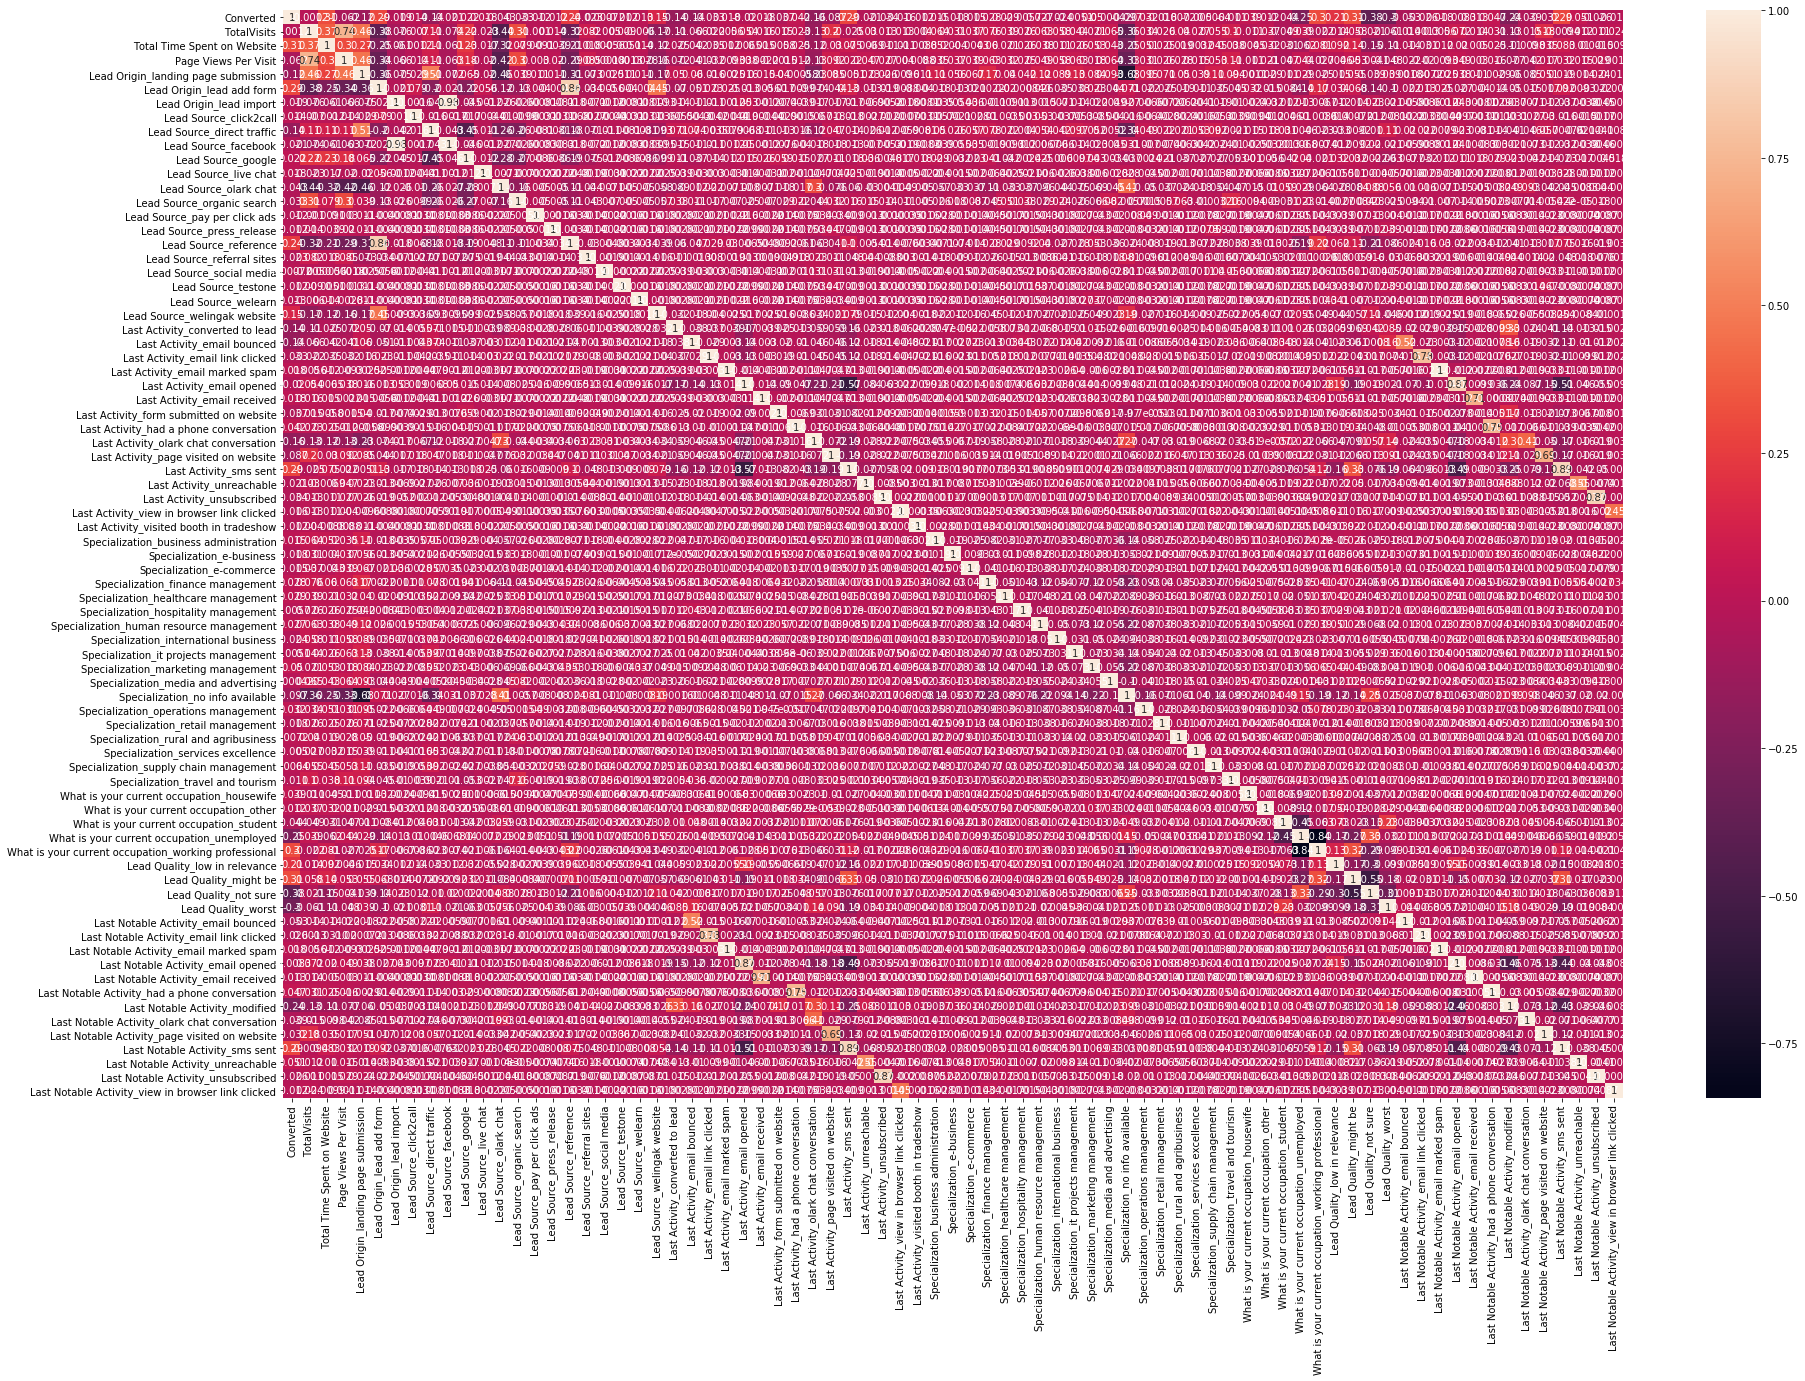

In [73]:
#Now lets check correlation b/w numeric variables
plt.figure(figsize = (30,20))
sns.heatmap(final_data.corr(),annot = True)
plt.show()

##### Cant figure out anything here

# 4. MODEL BUILDING

### Import required Libararies for regression & feature selection 

In [74]:
import statsmodels.api as sm

In [75]:

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4402
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 23 Feb 2024   Deviance:                          nan
Time:                        17:42:17   Pearson chi2:                 5.10e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  5.77e+15   8.22e+07   7.02e+07      0.000    5.77e+15    5.77e+15
TotalVisits                                           3.354e+14   1.79e+06   1.87e+08      0.000    3.35e+14    3.35e+14
Total Time Spent on Website                           7.333e+14   1.19e+06   6.16e+08      0.000    7.33e+14    7.33e+14
Page Views Per Visit                                 -2.093e+14    1.7e+06  -1.23e+08      0.000   -2.09e+14   -2.09e+14
Lead Origin_landing page submission                  -4.845e+14   3.74e+06  -1.29e+08      0.000   -4.85e+14   -4.85e+14
Lead Origin_lead add form                             4.852e+15   6.75e+07   7.18e+07      0.000    4.85e+15    4.85e+15
Lead Origin_lead import                              -2.248e+14    2.1e+07  -1.07e+07      0.000   -2.25e+14   -2.25e+14
Lead Source_click2call                               -4.879e+15    8.7e+07  -5.61e+07      0.000   -4.88e+15   -4.88e+15
Lead Source_direct traffic                             -3.2e+14   3.89e+07  -8.22e+06      0.000    -3.2e+14    -3.2e+14
Lead Source_facebook                                 -2.248e+14    2.1e+07  -1.07e+07      0.000   -2.25e+14   -2.25e+14
Lead Source_google                                   -1.164e+14   3.89e+07  -2.99e+06      0.000   -1.16e+14   -1.16e+14
Lead Source_live chat                                -2.984e+14   9.12e+07  -3.27e+06      0.000   -2.98e+14   -2.98e+14
Lead Source_olark chat                                3.714e+14    3.9e+07   9.52e+06      0.000    3.71e+14    3.71e+14
Lead Source_organic search                           -2.908e+14    3.9e+07  -7.46e+06      0.000   -2.91e+14   -2.91e+14
Lead Source_pay per click ads                           17.3167    4.9e-07   3.54e+07      0.000      17.317      17.317
Lead Source_press_release                            -2.406e+15    7.8e+07  -3.08e+07      0.000   -2.41e+15   -2.41e+15
Lead Source_reference                                -3.785e+15   7.79e+07  -4.86e+07      0.000   -3.79e+15   -3.79e+15
Lead Source_referral sites                            -4.83e+14      4e+07  -1.21e+07      0.000   -4.83e+14   -4.83e+14
Lead Source_social media                              1.026e+15   6.16e+07   1.67e+07      0.000    1.03e+15    1.03e+15
Lead Source_testone                                     47.4143   6.58e-07    7.2e+07      0.000      47.414      47.414
Lead Source_welearn                                   4.256e+15   7.77e+07   5.48e+07      0.000    4.26e+15    4.26e+15
Lead Source_welingak website                         -3.944e+15   7.82e+07  -5.05e+07      0.000   -3.94e+15   -3.94e+15
Last Activity_converted to lead                      -4.71

##### WE can crealy see here can be high multicollinearity GLM is not the best choice here so we will move for VIF analysis

In [76]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE
from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False])

In [78]:
# Features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_landing page submission', False, 13),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 37),
 ('Lead Source_click2call', False, 4),
 ('Lead Source_direct traffic', False, 5),
 ('Lead Source_facebook', False, 45),
 ('Lead Source_google', False, 8),
 ('Lead Source_live chat', False, 23),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 6),
 ('Lead Source_pay per click ads', False, 59),
 ('Lead Source_press_release', False, 56),
 ('Lead Source_reference', False, 36),
 ('Lead Source_referral sites', False, 7),
 ('Lead Source_social media', False, 26),
 ('Lead Source_testone', False, 60),
 ('Lead Source_welearn', False, 47),
 ('Lead Source_welingak website', True, 1),
 ('Last Activity_converted to lead', False, 24),
 ('Last Activity_email bounced', True, 1),
 ('Last Activity_email link clicked', False, 55),
 ('Las

In [79]:
# Puting all the columns selected by RFE in 'col'
col = X_train.columns[rfe.support_]

In [80]:
# Selecting columns 
X_train = X_train[col]

In [81]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1618.7
Date:                Fri, 23 Feb 2024   Deviance:                       3237.5
Time:                        17:49:03   Pearson chi2:                 4.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2523      0.131      9.554      0.000       0.995       1.509
Total Time Spent on Website                              1.0743      0.053     20.331      0.000       0.971       1.178
Lead Origin_lead add form                                2.6872      0.258     10.423      0.000       2.182       3.192
Lead Source_olark chat                                   1.6744      0.135     12.389      0.000       1.409       1.939
Lead Source_welingak website                             3.3416      0.766      4.361      0.000       1.840       4.843
Last Activity_email bounced                             -1.8207      0.464     -3.921      0.000      -2.731      -0.911
Last Activity_had a phone conversation                   0.8151      1.022      0.797      0.425      -1.189       2.819
Last Activity_sms sent                                   0.9024      0.097      9.336      0.000       0.713       1.092
Last Activity_view in browser link clicked             -22.0662   1.98e+04     -0.001      0.999   -3.88e+04    3.87e+04
What is your current occupation_working professional     1.6444      0.209      7.882      0.000       1.235       2.053
Lead Quality_might be                                   -1.1446      0.152     -7.516      0.000      -1.443      -0.846
Lead Quality_not sure                                   -2.8788      0.138    -20.844      0.000      -3.150      -2.608
Lead Quality_worst                                      -6.3828      0.605    -10.557      0.000      -7.568      -5.198
Last Notable Activity_had a phone conversation          21.0036   1.46e+04      0.001      0.999   -2.86e+04    2.86e+04
Last Notable Activity_modified                          -0.7299      0.104     -7.019      0.000      -0.934      -0.526
Last Notable Activity_unreachable                        2.8060      1.182      2.375      0.018       0.490       5.122
========================================================================================================================
"""

In [82]:
#Getting the predicted valueson the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

533     0.910126
846     0.949189
7546    0.939917
8631    0.727872
7824    0.001473
4986    0.516248
5542    0.600284
1719    0.140622
4860    0.986595
8609    0.095107
dtype: float64

In [83]:
#creating a data frame with the actual converted_flag and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
533,1,0.910126
846,1,0.949189
7546,1,0.939917
8631,0,0.727872
7824,0,0.001473


In [84]:
#creating new column 'Predicted' with 1 if churn prob is >.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
533,1,0.910126,1
846,1,0.949189,1
7546,1,0.939917,1
8631,0,0.727872,1
7824,0,0.001473,0


### VIF

In [86]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Making a VIF dataframe for all the variables present
vif_data = pd.DataFrame()
vif_data['Features'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Features,VIF
5,Last Activity_had a phone conversation,1.91
12,Last Notable Activity_had a phone conversation,1.90
6,Last Activity_sms sent,1.82
9,Lead Quality_might be,1.76
10,Lead Quality_not sure,1.68
1,Lead Origin_lead add form,1.60
13,Last Notable Activity_modified,1.49
3,Lead Source_welingak website,1.36
2,Lead Source_olark chat,1.31
8,What is your current occupation_working profes...,1.30


In [88]:
# dropping high VIF 
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [89]:
X_train.drop('Last Activity_had a phone conversation', axis = 1, inplace = True)

In [91]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1622.6
Date:                Fri, 23 Feb 2024   Deviance:                       3245.1
Time:                        17:54:39   Pearson chi2:                 4.42e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2732      0.131      9.728      0.000       1.017       1.530
Total Time Spent on Website                              1.0714      0.053     20.315      0.000       0.968       1.175
Lead Origin_lead add form                                2.6775      0.258     10.384      0.000       2.172       3.183
Lead Source_olark chat                                   1.6655      0.135     12.333      0.000       1.401       1.930
Lead Source_welingak website                             3.3470      0.766      4.368      0.000       1.845       4.849
Last Activity_email bounced                             -1.8340      0.464     -3.948      0.000      -2.744      -0.924
Last Activity_sms sent                                   0.8893      0.096      9.218      0.000       0.700       1.078
Last Activity_view in browser link clicked             -21.0762    1.2e+04     -0.002      0.999   -2.35e+04    2.35e+04
What is your current occupation_working professional     1.6397      0.208      7.865      0.000       1.231       2.048
Lead Quality_might be                                   -1.1398      0.152     -7.498      0.000      -1.438      -0.842
Lead Quality_not sure                                   -2.8907      0.138    -20.936      0.000      -3.161      -2.620
Lead Quality_worst                                      -6.3955      0.604    -10.580      0.000      -7.580      -5.211
Last Notable Activity_modified                          -0.7339      0.104     -7.080      0.000      -0.937      -0.531
Last Notable Activity_unreachable                        2.7906      1.183      2.360      0.018       0.473       5.109
========================================================================================================================
"""

In [92]:
#### P value is high for 'Last Activity_view in browser link clicked' so lets drop it 

X_train.drop('Last Activity_view in browser link clicked', axis = 1, inplace = True)

In [93]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.3
Date:                Fri, 23 Feb 2024   Deviance:                       3248.7
Time:                        18:01:37   Pearson chi2:                 4.42e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2654      0.131      9.696      0.000       1.010       1.521
Total Time Spent on Website                              1.0723      0.053     20.343      0.000       0.969       1.176
Lead Origin_lead add form                                2.6817      0.258     10.406      0.000       2.177       3.187
Lead Source_olark chat                                   1.6585      0.135     12.296      0.000       1.394       1.923
Lead Source_welingak website                             3.3429      0.766      4.363      0.000       1.841       4.845
Last Activity_email bounced                             -1.8277      0.464     -3.938      0.000      -2.737      -0.918
Last Activity_sms sent                                   0.8897      0.096      9.224      0.000       0.701       1.079
What is your current occupation_working professional     1.6349      0.208      7.878      0.000       1.228       2.042
Lead Quality_might be                                   -1.1298      0.152     -7.450      0.000      -1.427      -0.833
Lead Quality_not sure                                   -2.8812      0.138    -20.940      0.000      -3.151      -2.612
Lead Quality_worst                                      -6.3842      0.604    -10.562      0.000      -7.569      -5.199
Last Notable Activity_modified                          -0.7398      0.104     -7.142      0.000      -0.943      -0.537
Last Notable Activity_unreachable                        2.7907      1.182      2.360      0.018       0.473       5.108
========================================================================================================================
"""

In [94]:
# Checking VIF again
vif_data = pd.DataFrame()
vif_data['Features'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Features,VIF
5,Last Activity_sms sent,1.82
7,Lead Quality_might be,1.75
8,Lead Quality_not sure,1.68
1,Lead Origin_lead add form,1.60
10,Last Notable Activity_modified,1.48
3,Lead Source_welingak website,1.36
2,Lead Source_olark chat,1.31
6,What is your current occupation_working profes...,1.30
0,Total Time Spent on Website,1.26
9,Lead Quality_worst,1.18


#### Now all the VIF looks okay and P value also <.5 - we can fi the model for now

### Creating Prediction

In [95]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

533     0.911544
846     0.949650
7546    0.939883
8631    0.728679
7824    0.001477
4986    0.515423
5542    0.604206
1719    0.141975
4860    0.986632
8609    0.096142
dtype: float64

In [96]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.91154381, 0.94965006, 0.93988251, 0.72867899, 0.00147743,
       0.51542296, 0.6042057 , 0.14197527, 0.98663184, 0.09614154])

In [97]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,1,0.911544
1,1,0.949650
2,1,0.939883
3,0,0.728679
4,0,0.001477


In [98]:
# changing to 0 or 1 with the cut off as 50%
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,1,0.911544,1
1,1,0.949650,1
2,1,0.939883,1
3,0,0.728679,1
4,0,0.001477,0


## Model Evaluation - Train Set

### Confusion matrix 

In [99]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [100]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2005,  344],
       [ 413, 1711]], dtype=int64)

In [101]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8307623518891124

### Metrics beyond simple accuracy 

In [102]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [103]:
# Calculating the sensitivity
TP/(TP+FN)

0.8055555555555556

#### Specificity

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.8535547041294168

### ROC Curve

In [105]:
# Creating ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('[1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

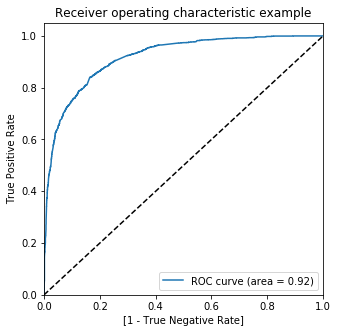

In [107]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

##### Area under roc curve is .92 which is good

In [110]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.911544,1,1,1,1,1,1,1,1,1,1,1
1,1,0.949650,1,1,1,1,1,1,1,1,1,1,1
2,1,0.939883,1,1,1,1,1,1,1,1,1,1,1
3,0,0.728679,1,1,1,1,1,1,1,1,1,0,0
4,0,0.001477,0,1,0,0,0,0,0,0,0,0,0


In [111]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.474849,1.000000,0.000000
0.1,0.1,0.700201,0.982109,0.445296
0.2,0.2,0.784261,0.948211,0.636015
0.3,0.3,0.822267,0.901601,0.750532
0.4,0.4,0.830986,0.864407,0.800766
0.5,0.5,0.830762,0.805556,0.853555
0.6,0.6,0.829868,0.756121,0.896552
0.7,0.7,0.818913,0.692561,0.933163
0.8,0.8,0.794769,0.611111,0.960834
0.9,0.9,0.729264,0.447269,0.984249


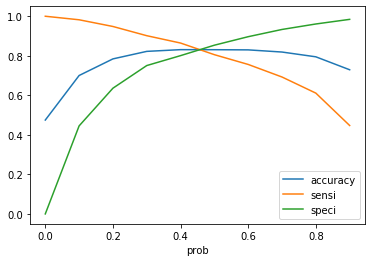

In [112]:
# Plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### As per above graph correct cutoff looks like at ~0.45

In [114]:
# Lets look on final prediction on train set with cutoff 0.45

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.911544,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.949650,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.939883,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.728679,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.001477,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8350100603621731

In [116]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1934,  415],
       [ 323, 1801]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


#### Sensitivity

In [118]:
# Calculating the sensitivity
TP/(TP+FN)

0.8479284369114878

#### Specificity

In [119]:
# Calculating the specificity
TN/(TN+FP)

0.8233290762026394

#### As we can see with the cut off .45 sensitivity and specificity is .85 & .82 which is really good to go ahead

### Model building on Test Set 

In [120]:
# Scaling numeric values
X_test[['Total Time Spent on Website']] = scaler.fit_transform(X_test[['Total Time Spent on Website']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
2938,4.0,0.998731,4.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4301,1.0,-0.376881,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5904,3.0,-0.256338,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6881,8.0,-0.680012,4.5,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5195,4.0,1.342634,4.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [121]:
# Substituting all the columns in the final train model
col = X_train.columns

In [122]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Last Activity_email bounced,Last Activity_sms sent,What is your current occupation_working professional,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Last Notable Activity_modified,Last Notable Activity_unreachable
2938,1.0,0.998731,0,0,0,0,1,1,1,0,0,0,0
4301,1.0,-0.376881,0,1,0,0,0,0,0,0,0,0,0
5904,1.0,-0.256338,0,0,0,0,0,0,1,0,0,0,0
6881,1.0,-0.680012,0,0,0,1,0,0,0,0,1,1,0
5195,1.0,1.342634,0,0,0,0,1,0,0,1,0,0,0


In [123]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.976597
1,0,0.925517
2,0,0.465255
3,0,0.000221
4,1,0.671210


In [125]:
# Making prediction using cut off 0.50
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.976597,1
1,0,0.925517,1
2,0,0.465255,0
3,0,0.000221,0
4,1,0.671210,1
...,...,...,...
1913,1,0.889107,1
1914,1,0.869474,1
1915,0,0.011209,0
1916,1,0.548531,1


In [126]:
# Check the overall accuracy at 50 cutoff
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8169968717413972

In [169]:
# Making prediction using cut off 0.45
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.976597,1
1,0,0.925517,1
2,0,0.465255,1
3,0,0.000221,0
4,1,0.671210,1
...,...,...,...
1913,1,0.889107,1
1914,1,0.869474,1
1915,0,0.011209,0
1916,1,0.548531,1


In [170]:
# Check the overall accuracy at .35 cutoff
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8284671532846716

In [171]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 178],
       [151, 790]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] #false positives
FN = confusion2[1,0] #false negatives

In [173]:
# Calculating the sensitivity
TP/(TP+FN)

0.8395324123273114

In [174]:
# Calculating the specificity
TN/(TN+FP)

0.8178096212896623

#### On cutoff of .45 our accuracy & sensitivity  is ~84 and specificty is ~82 which is good

### Confusion Precision & Recall Metrics

In [133]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2005,  344],
       [ 413, 1711]], dtype=int64)

In [134]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.832603406326034

In [135]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8055555555555556

#### On cutoff of .35 our Recall & Precision is  >80  which is  good

In [136]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 4468    0
 4469    0
 4470    1
 4471    0
 4472    0
 Name: Converted, Length: 4473, dtype: int64,
 0       1
 1       1
 2       1
 3       1
 4       0
        ..
 4468    0
 4469    0
 4470    1
 4471    0
 4472    0
 Name: Predicted, Length: 4473, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

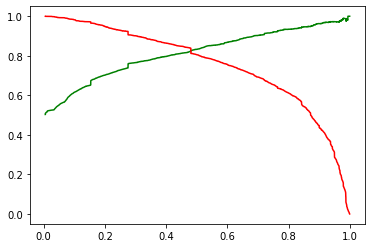

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [143]:
#with cutoff .45
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.911544,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.949650,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.939883,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.728679,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.001477,0,1,0,0,0,0,0,0,0,0,0,0


In [144]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8350100603621731

In [145]:
# confusion matrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1934,  415],
       [ 323, 1801]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [159]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8161157024793388

In [160]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8395324123273114

##### with 0.45 cutoff precision and recall is >80 

### Prediction on Test set


In [161]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.976597
1,0,0.925517
2,0,0.465255
3,0,0.000221
4,1,0.671210


In [163]:
# Making prediction using cut off 0.45
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.976597,1
1,0,0.925517,1
2,0,0.465255,1
3,0,0.000221,0
4,1,0.671210,1
...,...,...,...
1913,1,0.889107,1
1914,1,0.869474,1
1915,0,0.011209,0
1916,1,0.548531,1


In [164]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8284671532846716

In [165]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 178],
       [151, 790]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8161157024793388

In [168]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8395324123273114

##### with .45 cutoff precision and recall is >80 
##### Seems everything is in place lets conclude the case study

# Conclusion & Findings

### As per our model variable that are important in converting a lead are:

#### 1. Where Lead Origin is 'lead add form'

#### 2. Where Lead Source are:
##### •	'olark chat'
##### •	'welingak website'
#### 3. Occupation is 'working professional'
#### 4. Last Notable activity is 'Modified'
#### 5. Last Activity is 'SMS Sent'
#### 6. Lead Quality is 'Not Sure' and 'might be' (not sure are the cases where sales team did not fill anything)
#### 7. Also some less important variables are that are behaviorally looking off:
##### •	Last Activity email bounced
##### •	 Lead Quality worst
###### • Last Notable Activity unreachable
#### We can further work on fine tuning for this but for its looking convincing.

 


# THANK YOU :)